In [1]:
import pandas as pd
import geocoder
import time
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint
import re as re



In [38]:
#Extraemos la información de un archivo csv para cargarla posteriormente en un DataFrame.
#El archivo presenta errores de codificación por lo que ha sido necesario averiguar qué encoding
#se ajustaba mejor a  los datos.
df=pd.read_csv('/home/miguel/IronHack/DataSets/GSAF5.csv', encoding='Windows-1252')


In [39]:
#Limpiezas

#Renombramos nombres de algunas columnas que tienen espacios en blanco.
df.rename(index=str, columns={"Case Number":"ID_Case","Sex ": "Sex", "Species ": 'Species','Fatal (Y/N)':'FATAL'},inplace=True)

#Quitamos espacios.
df.Location=df.Location.str.strip()
df.Country=df.Country.str.strip()

#Pasamos todos los valores NaN de la columna FATAL a UNKNOWN
df.FATAL=df.FATAL.fillna('UNKNOWN', inplace=True)
df.Age=df.Age.fillna('999', inplace=True)

#Normalizamos fechas partiendo de case_number.
df['Normalized_Date']=df['ID_Case'].apply(lambda x: x.replace(".","-")[:-2] if len(x)>10 else x.replace(".",'-'))

#Quitamos los registros que no tienen una fecha válida
df=df[df.Normalized_Date.str.match('\d{4}-\d{1,2}-\d{1,2}')]

#Quitamos las columnas que no tienen datos utiles o que están en su mayor parte vacias. Para ver que columnas tenían un 
#mayot porcentaje de valores nulos se ha usado la función empty_column definida más abajo.
df.drop(['original order','pdf', 'href formula', 'href','Case Number.1', 'Case Number.2','Name','Unnamed: 22','Unnamed: 23','original order'], axis=1,inplace=True)

#Eliminamos los registros que contengan algún valor nulo
df.dropna(inplace=True)

#Una vez limipiados los datos procedemos a exportar el dataFrame



In [42]:
df.to_csv("/GSAF5.csv")

PermissionError: [Errno 13] Permission denied: '/GSAF5.csv'

In [4]:
def empty_column(df):
    '''
    Cálcula el porcentage de valores nulos que contiene una columna y devulve los resultados e una lista
    '''
    empty_results=[]
    for columna in df.columns:
        result=[]
        percentage_empty=(df.shape[0]-df[[columna]].count()[0])/df.shape[0]
        
        result.append(columna)
        result.append(percentage_empty)
        
        empty_results.append(result)
    return empty_results


empty_results=empty_column(df)
empty_results



[['Case Number', 0.0],
 ['Date', 0.0],
 ['Year', 0.0],
 ['Type', 0.0],
 ['Country', 0.00664734958241009],
 ['Area', 0.0642577126299642],
 ['Location', 0.07874552582239645],
 ['Activity', 0.08641554457133117],
 ['Sex', 0.09493778762570308],
 ['Age', 0.43787284813362876],
 ['Injury', 0.004431566388273394],
 ['FATAL', 0.003238452360661326],
 ['Time', 0.5275268450656213],
 ['Species', 0.48457474007158685],
 ['Investigator or Source', 0.0025566729163115733],
 ['normalized_date', 0.0]]

In [29]:
#Una vez que los datos se han limpiado ya se podría hacer algún anáilisis sobre ellos. Por ejemplo, se podría mostrar
#en un gráfico el número de ataques agrupado por paises.
paises=(df[['Country','Location']].groupby('Country').count())
paises['Country']=paises.index
paises.rename(index=str, columns={"Location":"Count"},inplace=True)
paises_mas_50=paises[paises.Count>50]
paises_mas_50

,Count,Country
Country,,
AUSTRALIA,1228,AUSTRALIA
BAHAMAS,72,BAHAMAS
BRAZIL,98,BRAZIL
ITALY,66,ITALY
MEXICO,71,MEXICO
NEW ZEALAND,120,NEW ZEALAND
PAPUA NEW GUINEA,117,PAPUA NEW GUINEA
SOUTH AFRICA,549,SOUTH AFRICA
USA,2058,USA


Index(['AUSTRALIA', 'BAHAMAS', 'BRAZIL', 'ITALY', 'MEXICO', 'NEW ZEALAND',
       'PAPUA NEW GUINEA', 'SOUTH AFRICA', 'USA'],
      dtype='object', name='Country')

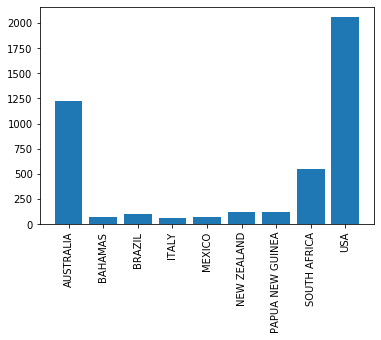

In [11]:
plt.bar(paises_mas_25.Country,paises_mas_25.Location)
plt.xticks(paises_mas_25.Country, rotation='vertical')
paises_mas_25.index.sort_values()

In [27]:
#Para sacar las cordenadas aproximada asociada a cada ataque. Hay que ponerle un sleep para que no nos bloquee el servidor.
df.Location
coordinates=[]
for location in df.Location:
    g = geocoder.osm(location)
    time.sleep(1.1)
    coordinates.append(g.latlng)
    print(g.latlng)

[29.0258191, -80.9269984]
[29.0258191, -80.9269984]


KeyboardInterrupt: 